<a href="https://colab.research.google.com/github/trinadhmatta2123/OIBSIB/blob/main/task1-Retail%20Sales%20Data/oasis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis (EDA) on Retail Sales Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [ ]:
# Load
df = pd.read_csv('/content/drive/MyDrive/retail_sales_dataset.csv')


In [ ]:
print(df.head())
print(df.info())
print(df.describe())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   obj

handle missing data


In [ ]:
print(df.isnull().sum())
df = df.dropna()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


Dtype conversion

In [ ]:
df['Total Amount'] = df['Total Amount'].astype(float)
df['Quantity'] = df['Quantity'].astype(int)
df['Age'] = df['Age'].astype(int)

In [ ]:
print(df.describe())
print('Mean Sales:', df['Total Amount'].mean())
print('Median Sales:', df['Total Amount'].median())
print('Mode Sales:', df['Total Amount'].mode()[0])
print('Standard Deviation of Sales:', df['Total Amount'].std())


       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000
Mean Sales: 456.0
Median Sales: 135.0
Mode Sales: 50.0
Standard Deviation of Sales: 559.997631555123


 Customer and Product Analysis
  Age Distribution

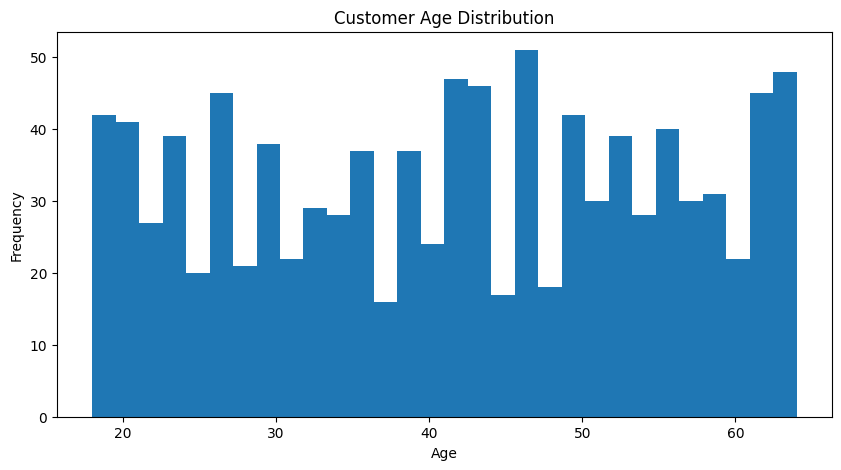

In [ ]:

plt.figure(figsize=(10, 5))
df['Age'].plot(kind='hist', bins=30, title='Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

gender distribution

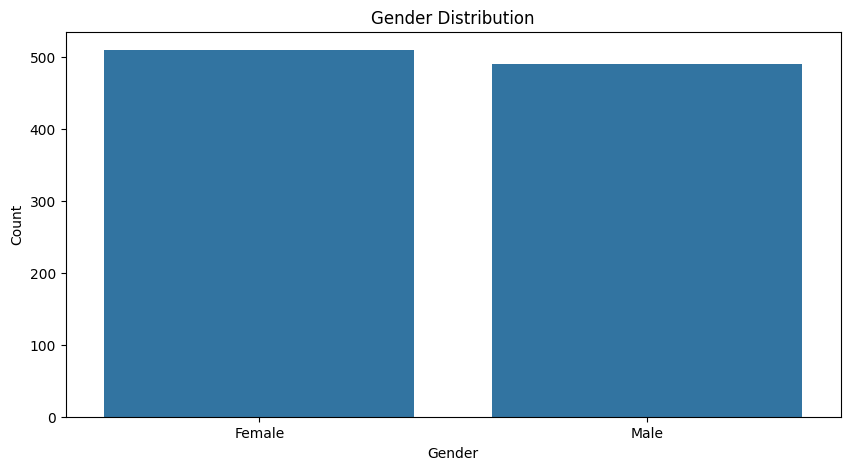

In [ ]:
plt.figure(figsize=(10, 5))
gender_counts = df['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

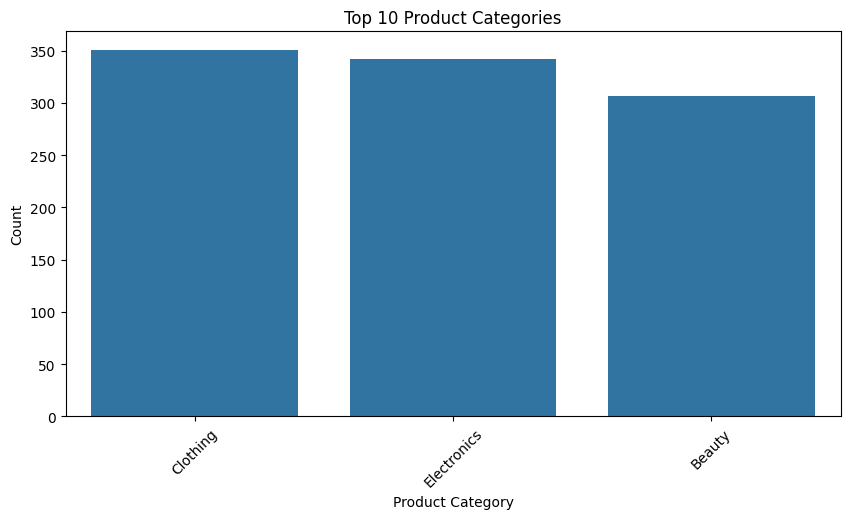

In [ ]:
plt.figure(figsize=(10, 5))
top_products = df['Product Category'].value_counts().head(10)
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

sales by product category

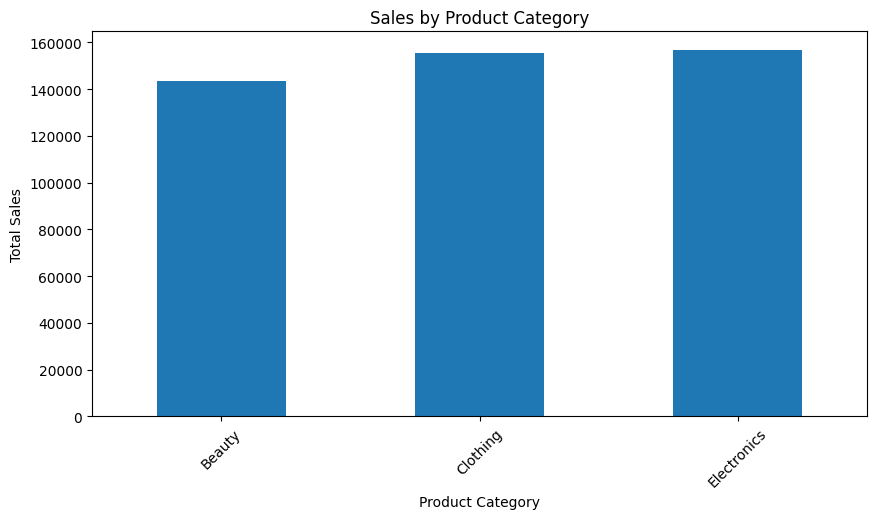

In [ ]:
plt.figure(figsize=(10, 5))
sales_by_category = df.groupby('Product Category')['Total Amount'].sum()
sales_by_category.plot(kind='bar', title='Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

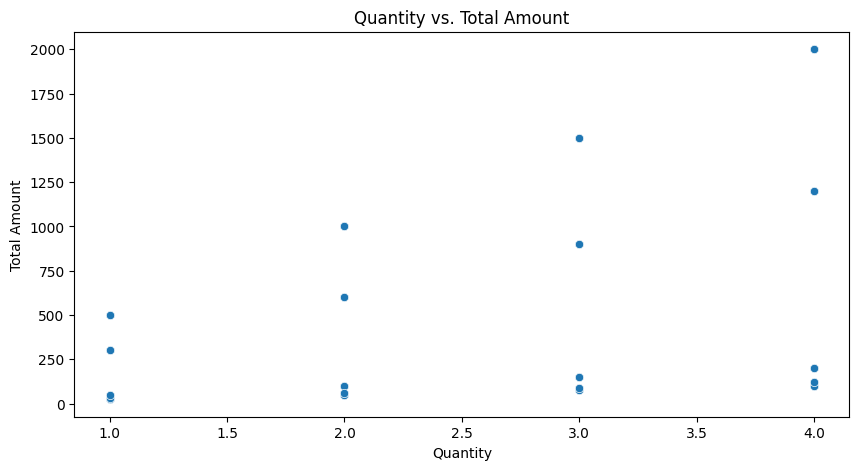

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Quantity', y='Total Amount')
plt.title('Quantity vs. Total Amount')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.show()

heatmap visualization

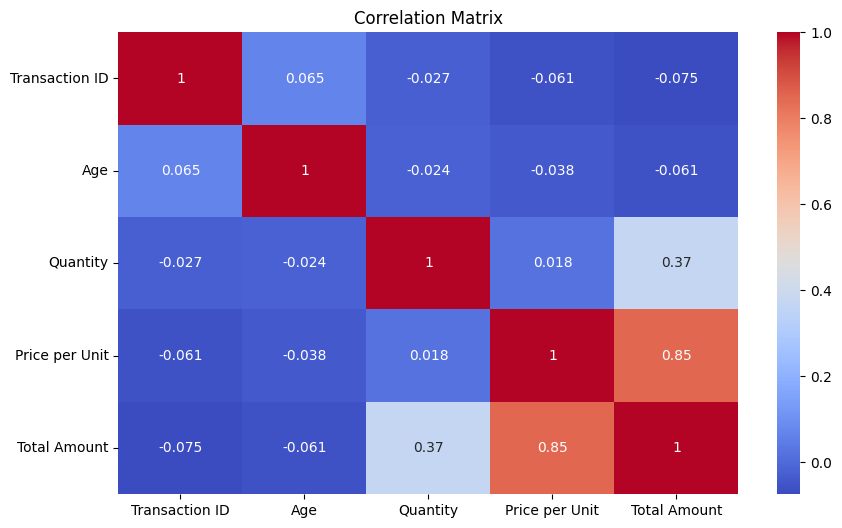

In [ ]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

recommendations

In [ ]:
def provide_recommendations():
    print("Recommendations:")
    print("1. Focus on the top-selling product categories to maximize sales.")
    print("2. Analyze customer demographics to target marketing campaigns effectively.")
    print("3. Ensure popular products are well-stocked to meet demand.")
    print("4. Explore cross-selling opportunities by analyzing purchase patterns.")
    print("5. Consider age and gender distribution to tailor product offerings.")

provide_recommendations()


Recommendations:
1. Focus on the top-selling product categories to maximize sales.
2. Analyze customer demographics to target marketing campaigns effectively.
3. Ensure popular products are well-stocked to meet demand.
4. Explore cross-selling opportunities by analyzing purchase patterns.
5. Consider age and gender distribution to tailor product offerings.
